# PROJECT 1

Pada Project 1 ini saya menggunakan data E-Commerce Sales Dataset yang bersumber dari kaggel, dataset ini berisi detail penjualan platform E-Commerce yang terdiri dari dua dataset, yaitu:
1. Customer Details, mencakup 20.000 data pelanggan (customer_id, sex, customer_age, tenure)
2. Basket Details, mencakup 15.000 data transaksi keranjang (customer_id, product_id, basket_date, basket_count)
(https://www.kaggle.com/berkayalan/ecommerce-sales-dataset)

# Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [ ]:
customer = pd.read_csv('/content/drive/MyDrive/Project/DATA PROJECT PORTOFOLIO/Project 1a_customer_details.csv')

In [ ]:
basket = pd.read_csv('/content/drive/MyDrive/Project/DATA PROJECT PORTOFOLIO/Project 1b_basket_details.csv')

# Cuplikan Data

In [ ]:
# 5 baris teratas dari data customer
customer.head()

,customer_id,sex,customer_age,tenure
0,9798859,Male,44.0,93
1,11413563,Male,36.0,65
2,818195,Male,35.0,129
3,12049009,Male,33.0,58
4,10083045,Male,42.0,88


In [ ]:
# informasi general tentang dataset customer
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   20000 non-null  int64  
 1   sex           20000 non-null  object 
 2   customer_age  20000 non-null  float64
 3   tenure        20000 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 625.1+ KB


In [ ]:
customer.describe()

,customer_id,customer_age,tenure
count,2.000000e+04,20000.000000,20000.000000
mean,1.760040e+07,262.222550,44.396800
std,8.679505e+06,604.321589,31.998376
min,2.093000e+03,-34.000000,4.000000
25%,1.188115e+07,29.000000,21.000000
50%,1.560912e+07,38.000000,35.000000
75%,2.228484e+07,123.000000,60.000000
max,4.462566e+07,2022.000000,133.000000


Pada cuplikan data diatas dapat dilihat banyak data, rata-rata, standar deviasi, nilai minimum dan maksimum, serta nilai kuartil 1, 2, dan 3 dari dataset customer

In [ ]:
# 5 baris teratas dari data basket
basket.head()

,customer_id,product_id,basket_date,basket_count
0,42366585,41475073,2019-06-19,2
1,35956841,43279538,2019-06-19,2
2,26139578,31715598,2019-06-19,3
3,3262253,47880260,2019-06-19,2
4,20056678,44747002,2019-06-19,2


In [ ]:
# informasi general tentang dataframe basket
basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customer_id   15000 non-null  int64 
 1   product_id    15000 non-null  int64 
 2   basket_date   15000 non-null  object
 3   basket_count  15000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 468.9+ KB


In [ ]:
basket.describe()

,customer_id,product_id,basket_count
count,1.500000e+04,1.500000e+04,15000.000000
mean,1.808567e+07,3.269771e+07,2.153733
std,1.233000e+07,1.629455e+07,0.517929
min,4.784000e+03,4.939000e+04,2.000000
25%,8.659327e+06,3.137412e+07,2.000000
50%,1.520775e+07,3.694759e+07,2.000000
75%,2.663904e+07,4.502408e+07,2.000000
max,4.460824e+07,5.579097e+07,10.000000


Pada cuplikan data diatas dapat dilihat banyak data, rata-rata, standar deviasi, nilai minimum dan maksimum, serta nilai kuartil 1, 2, dan 3 dari dataset basket

# Data Prepocessing

# #handling missing data

In [ ]:
# jumlah entry NULL di setiap kolom
customer.isna().sum()

customer_id     0
sex             0
customer_age    0
tenure          0
dtype: int64

In [ ]:
# jumlah entry NULL di setiap kolom
basket.isna().sum()

customer_id     0
product_id      0
basket_date     0
basket_count    0
dtype: int64

Tidak ada missing value untuk kedua dataset

# #handling duplicate data

In [ ]:
# cek jumlah duplicate rows dari semua rows
customer.duplicated().sum()

0

In [ ]:
# cek jumlah duplicate rows dari semua rows
basket.duplicated().sum()

0

Tidak ada data duplicate untuk masing-masing dataset

# PROJECT 1A

# Analisis Eksploratif Data (Customer Dataset)

In [ ]:
#Periksa kategori apa saja yang ada pada kolom sex
customer.sex.unique()

array(['Male', 'Female', 'kvkktalepsilindi', 'UNKNOWN'], dtype=object)

In [ ]:
#Periksa pada objek berapa yang memiliki kategori 'UNKNOWN'
customer.index[customer['sex']=='UNKNOWN'].tolist()

[3597]

In [ ]:
#Periksa pada objek berapa yang memiliki kategori 'kvkktalepsilindi'
customer.index[customer['sex']=='kvkktalepsilindi'].tolist()

[1201, 6133, 6443, 8481, 9283, 10035, 11102, 19785]

In [ ]:
#Drop objek yang memiliki kategori selain Male dan Female
customer1= customer.drop([customer.index[1201], customer.index[6133],customer.index[6443], customer.index[8481],customer.index[9283], customer.index[10035],customer.index[11102], customer.index[19785],customer.index[3597]])
customer1

,customer_id,sex,customer_age,tenure
0,9798859,Male,44.0,93
1,11413563,Male,36.0,65
2,818195,Male,35.0,129
3,12049009,Male,33.0,58
4,10083045,Male,42.0,88
...,...,...,...,...
19995,12557307,Male,41.0,52
19996,12595961,Male,29.0,52
19997,12520991,Male,35.0,52
19998,12612719,Male,39.0,52


In [ ]:
#Cek kembali kategori apa saja yang ada pada kolom sex
customer1.sex.unique()

array(['Male', 'Female'], dtype=object)

Setelah kolom sex dibersihkan dari kategori selain gender, maka customer yang tersisa ada sebanyak 19991 customer.

In [ ]:
#melihat jumlah customer berdasarkan jenis kelamin
gender=customer1.groupby('sex').count()
gender

,customer_id,customer_age,tenure
sex,,,
Female,4669,4669,4669
Male,15322,15322,15322


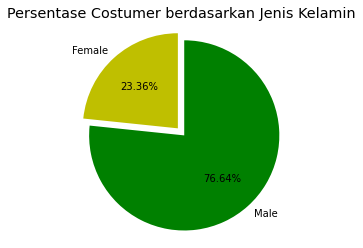

In [ ]:
#Visual perbandingan jenis kelamin costumer berdasarkan Jenis Kelamin
import matplotlib.pyplot as plt

labels = 'Female', 'Male'
sections = [4669, 15322]
colors = ['y', 'g']

plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode = (0, 0.1),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('Persentase Costumer berdasarkan Jenis Kelamin')
plt.show()

Costumer didominasi oleh jenis kelamin lagi-laki sebanyak 76%

In [ ]:
#Kelompokkan data berdasarkan usia untuk melihat sebaran penjualan sesuai usianya
age = pd.pivot_table(data=customer, index=['customer_age'],values='customer_id', aggfunc=['count'])
age

,count
,customer_id
customer_age,
-34.0,1
3.0,2
4.0,1
5.0,710
6.0,1
...,...
127.0,1
130.0,1


In [ ]:
#Periksa dan drop jika terdapat outlier pada usia
from scipy import stats
import numpy as np
z_scores = stats.zscore(age)
#calculate z-scores of `df`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
ages = age[filtered_entries]

print(ages)

                   count
             customer_id
customer_age            
-34.0                  1
 3.0                   2
 4.0                   1
 5.0                 710
 6.0                   1
...                  ...
 124.0                 5
 127.0                 1
 130.0                 1
 139.0                 1
 149.0                 1

[91 rows x 1 columns]


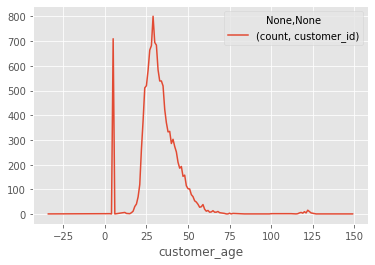

In [ ]:
ages.plot()

Kontribusi terbesar datang dari customer dengan kelompok usia 25 sampai 50 tahun 

In [ ]:
#Total Tenure customer berdasarkan gender
tenure=customer1.groupby('sex')['tenure'].sum()
tenure

sex
Female    175260
Male      712325
Name: tenure, dtype: int64

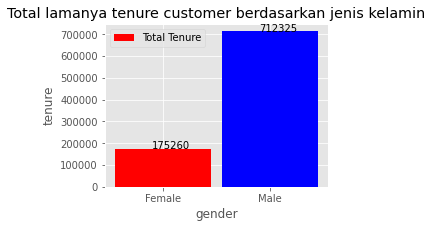

In [ ]:
#Visualization
import matplotlib.pyplot as plt
plt.figure(figsize = (4,3))
gender = ['Female', 'Male']

tenure = [175260, 712325]
plt.bar(gender, tenure, width= 0.9, align='center', color=['r', 'b'])
i = 1.0
j = 0
for i in range(len(gender)):
    plt.annotate(tenure[i], (-0.1 + i, tenure[i] + j))

plt.legend(labels = ['Total Tenure'])
plt.title("Total lamanya tenure customer berdasarkan jenis kelamin")
plt.xlabel('gender')
plt.ylabel('tenure')
plt.show()

Berdasarkan bar chart diatas dapat dilihat customer dengan jenis kelamin laki-laki cenderung memiliki total waktu tenure yang lebih lama dibandingkan total waktu tenure customer perempuan.

# Conclusion & Analytics Approach 

# Conclusion
Berdasarkan hasil analisis Project 1A menggunakan dataset customer dapat disimpulkan:
1. Costumer didominasi oleh jenis kelamin laki-laki sebanyak 76%, dimana customer laki-laki memiliki transaksi keranjang yang lebih banyak dan waktu tenor lebih sering dan lebih lama
2. Kontribusi terbesar datang dari customer dengan kelompok usia 25 sampai 50 tahun.

# Analystics Approach
1. Diagnostic Analytics
- Bisa saja terjadi karena produk yang disediakan oleh ecommerce merupakan produk yang lebih disukai oleh customer laki-laki dan customer dengan kelompok usia 25 sampai dengan 50 tahun.

2. Predictive Analytics
- Sekarang seller mengetahui target pasar mereka, yaitu customer dengan jenis kelamin laki-laki, serta customer dengan kelompok usia 25 sampai 50 tahun. Hal ini akan mengakibatkan produk yang biasanya dibeli oleh customer wanita, akan lebih sulit terjual atau membutuhkan waktu yang lebih lama agar produk-produk tersebut bisa terjual. 

3. Prespective Analytics
- Sebaiknya seller menyediakan barang yang sesuai dengan customer dengan konstribusi terbesar, yaitu customer dengan kelompok usia 25 sampai 50 tahun.
- Ada baaiknya juga seller menyediakan barang yang menarik perhatian customer perempuan.